# Analysis on Lyft's Bay Wheels Bike Sharing Program

# Table of Contents
- Gathering
- Assessing
- Cleaning
- Analysis

## Gathering

In [1]:
import os
import requests
import zipfile
import io
import glob
import numpy as np
import pandas as pd

In [2]:
#Create folder to store files
folder_name = 'raw_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
#Create function to download and extract files from source
def extract(x):
    #download file and extract
    response= requests.get(x)
    try:
        zp = zipfile.ZipFile(io.BytesIO(response.content))
        zp.extractall(folder_name)
    
    #if not a valid link, ignore and continue the script
    except zipfile.BadZipFile:
        pass

In [4]:
#Get the month year component of the URL
month_year = []
for i in range(2017, 2020):
    if i == 2017:
        month_year.append(str(i))
    else:
        for j in range(1,13):
            month_year.append(str(i) + str(j).zfill(2))  #make sure MM is in double digit

#Re-create URL and download link
for i in month_year:
    if i < '201905':
        old_url = 'https://s3.amazonaws.com/baywheels-data/{}-fordgobike-tripdata.csv.zip'.format(i)
        extract(old_url)
    else:
        new_url = 'https://s3.amazonaws.com/baywheels-data/{}-baywheels-tripdata.csv.zip'.format(i)
        extract(new_url)

In [5]:
#Concatenate all csv into one dataframe
master = pd.concat((pd.read_csv(files, dtype={'bike_share_for_all_trip': object, 'rental_access_method': object}) for files in glob.glob(folder_name+'/*.csv')), sort=False, ignore_index=True)

In [6]:
#Clone master file
df = master.copy()

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN


In [8]:
#Clone master file
df = master.copy()

In [9]:
#Ensure dataframe is working
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
4688696,297,2019-11-07 19:09:44.2300,2019-11-07 19:14:42.0220,356.0,Valencia St at Clinton Park,37.769188,-122.422285,411.0,Octavia Blvd at Page St,37.774018,-122.423809,107,Subscriber,No,NaN
1537352,426,2018-07-01 11:44:15.1630,2018-07-01 11:51:21.5740,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,323.0,Broadway at Kearny,37.798014,-122.405950,3788,Customer,No,NaN
2300974,300,2018-12-18 08:58:13.5620,2018-12-18 09:03:14.1440,189.0,Genoa St at 55th St,37.839649,-122.271756,151.0,53rd St at Hollis St,37.836182,-122.287180,4708,Subscriber,No,NaN
4268238,2577,2019-09-08 12:17:44.9320,2019-09-08 13:00:42.1430,323.0,Broadway at Kearny,37.798014,-122.405950,120.0,Mission Dolores Park,37.761420,-122.426435,11482,Customer,No,NaN
239667,577,2017-10-16 08:48:24.6240,2017-10-16 08:58:02.0360,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2235,Subscriber,NaN,NaN


## Assessing

In [10]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740302 entries, 0 to 4740301
Data columns (total 15 columns):
duration_sec               4740302 non-null int64
start_time                 4740302 non-null object
end_time                   4740302 non-null object
start_station_id           4668816 non-null float64
start_station_name         4669413 non-null object
start_station_latitude     4740302 non-null float64
start_station_longitude    4740302 non-null float64
end_station_id             4666976 non-null float64
end_station_name           4667526 non-null object
end_station_latitude       4740302 non-null float64
end_station_longitude      4740302 non-null float64
bike_id                    4740302 non-null int64
user_type                  4740302 non-null object
bike_share_for_all_trip    4127445 non-null object
rental_access_method       93157 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 542.5+ MB


In [11]:
df.user_type.unique(), df.bike_share_for_all_trip.unique(), df.rental_access_method.unique()

(array(['Customer', 'Subscriber'], dtype=object),
 array([nan, 'No', 'Yes'], dtype=object),
 array([nan, 'app', 'clipper'], dtype=object))

In [12]:
df.bike_id.value_counts().describe()

count    12109.000000
mean       391.469320
std        436.445047
min          1.000000
25%         74.000000
50%        193.000000
75%        610.000000
max       2000.000000
Name: bike_id, dtype: float64

In [13]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN


In [14]:
#Check for missing coordinates
df.query('start_station_latitude == 0 | end_station_latitude ==0').head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
3016391,2365,2019-04-30 18:21:42.6100,2019-04-30 19:01:08.1460,50.0,2nd St at Townsend St,37.780526,-122.390288,420.0,SF Test Station,0.0,0.0,1612,Subscriber,No,NaN
3017157,1964,2019-04-30 17:31:19.6460,2019-04-30 18:04:04.5180,98.0,Valencia St at 16th St,37.765052,-122.421866,420.0,SF Test Station,0.0,0.0,3507,Subscriber,No,NaN
3017311,546,2019-04-30 17:45:38.4520,2019-04-30 17:54:45.2580,370.0,Jones St at Post St,37.787327,-122.413278,420.0,SF Test Station,0.0,0.0,1142,Subscriber,Yes,NaN
3017390,630,2019-04-30 17:39:33.5070,2019-04-30 17:50:04.3140,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420.0,SF Test Station,0.0,0.0,3500,Subscriber,No,NaN
3017843,433,2019-04-30 17:17:10.4860,2019-04-30 17:24:23.9190,11.0,Davis St at Jackson St,37.797280,-122.398436,420.0,SF Test Station,0.0,0.0,1181,Subscriber,No,NaN


In [15]:
#Check for missing station id
df[df.end_station_id.isnull()|df.start_station_id.isnull()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
1143064,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,No,NaN
1143076,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,Yes,NaN
1143093,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,No,NaN
1143129,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,No,NaN
1143156,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,No,NaN


### Action Plan

#### Quality Related
- Convert *start_time* and *end_time* to datefime
- Convert *start_station_id*, *end_station_id* and *bike_id* to strings
- Remove entries with missing station id

#### Tidiness Related
- Create new duration column in minutes
- Create new datetime columns
- Calculate distance based off coordinates (latitude and longitude)
- Create bins based on time of usage (Morning, Afternoon, Evening, Night)

## Cleaning

### Convert *start_time* and *end_time* to datefime

In [16]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

### Convert *start_station_id*, *end_station_id* and *bike_id* to strings

In [17]:
df['start_station_id'] = df['start_station_id'].astype(str).str.replace('\.0','')
df['end_station_id'] = df['end_station_id'].astype(str).str.replace('\.0','')
df['bike_id'] = df['bike_id'].astype(str)

**Test**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740302 entries, 0 to 4740301
Data columns (total 15 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
bike_share_for_all_trip    object
rental_access_method       object
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 542.5+ MB


### Remove entries with missing station id and station name

In [19]:
df.dropna(subset=['start_station_id', 'end_station_id', 'start_station_name', 'end_station_name'], inplace=True)

**Test**

In [20]:
df[df.end_station_id.isnull()|df.start_station_id.isnull()|df.start_station_name.isnull()|df.end_station_name.isnull()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method


### Create new duration column in minutes

In [21]:
df['duration_min'] = (df.duration_sec/60).round(2)

### Create new datetime columns

In [22]:
df['start_year'] = df.start_time.dt.year
df['start_month'] = df.start_time.dt.month
df['start_week'] = df.start_time.dt.weekday_name
df['start_date'] = df.start_time.dt.to_period('M')
df['start_hour'] = df.start_time.dt.hour

In [23]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
classes = pd.api.types.CategoricalDtype(ordered=True, categories= weekday_order)
df['start_week'] = df.start_week.astype(classes)

### Calculate distance based off coordinates

In [24]:
#Function for the Haversine Formula
#All credit goes to @derricw: https://stackoverflow.com/a/29546836

def haversine(lon1, lat1, lon2, lat2):
    
    """    
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367.8 * c # Units in km.  3959.87433 for miles
    return km

In [25]:
#Create column
df['distance'] = haversine(df['start_station_longitude'],df['start_station_latitude'],df['end_station_longitude'],df['end_station_latitude'])

In [26]:
#Could see that there are outliners due to missing coordinates
df.query('start_station_latitude == 0 | end_station_latitude ==0').head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,start_year,start_month,start_week,start_date,start_hour,distance
3016391,2365,2019-04-30 18:21:42.610,2019-04-30 19:01:08.146,50,2nd St at Townsend St,37.780526,-122.390288,420,SF Test Station,0.0,...,Subscriber,No,NaN,39.42,2019,4,Tuesday,2019-04,18,12786.379906
3017157,1964,2019-04-30 17:31:19.646,2019-04-30 18:04:04.518,98,Valencia St at 16th St,37.765052,-122.421866,420,SF Test Station,0.0,...,Subscriber,No,NaN,32.73,2019,4,Tuesday,2019-04,17,12789.588682
3017311,546,2019-04-30 17:45:38.452,2019-04-30 17:54:45.258,370,Jones St at Post St,37.787327,-122.413278,420,SF Test Station,0.0,...,Subscriber,Yes,NaN,9.10,2019,4,Tuesday,2019-04,17,12787.988074
3017390,630,2019-04-30 17:39:33.507,2019-04-30 17:50:04.314,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,420,SF Test Station,0.0,...,Subscriber,No,NaN,10.50,2019,4,Tuesday,2019-04,17,12786.874940
3017843,433,2019-04-30 17:17:10.486,2019-04-30 17:24:23.919,11,Davis St at Jackson St,37.797280,-122.398436,420,SF Test Station,0.0,...,Subscriber,No,NaN,7.22,2019,4,Tuesday,2019-04,17,12786.372190


In [27]:
df = df.query('start_station_latitude != 0 & end_station_latitude !=0')
df.reset_index(drop=True).head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,start_year,start_month,start_week,start_date,start_hour,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Customer,NaN,NaN,1335.17,2017,12,Sunday,2017-12,16,0.942458
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Customer,NaN,NaN,1313.33,2017,12,Sunday,2017-12,15,3.068185
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,Customer,NaN,NaN,762.80,2017,12,Sunday,2017-12,22,0.000000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,Customer,NaN,NaN,1036.20,2017,12,Sunday,2017-12,17,1.046096
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Subscriber,NaN,NaN,726.72,2017,12,Sunday,2017-12,14,0.636020


**Test**

In [28]:
df.query('start_station_latitude == 0 | end_station_latitude ==0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,duration_min,start_year,start_month,start_week,start_date,start_hour,distance


### Create bins based on time of usage

In [29]:
#Define Morning: 5:00 - 11:59, Afternoon: 12:00 to 16:59, Evening: 17:00 - 20:59, Night: 21- 4:59

bin_name = ['NightX','Morning', 'Afternoon','Evening','Night']
bin_edges= [0,5,12,17,21,24]
df['period'] = pd.cut(df['start_hour'], bin_edges, labels=bin_name, right=False).str.replace('NightX','Night')

#Make them categorical
period_class_order = ['Morning', 'Afternoon','Evening','Night']
classes = pd.api.types.CategoricalDtype(ordered=True, categories= period_class_order)
df['period'] = df.period.astype(classes)

## Analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [31]:
#Define Log function
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)

### Univariate Exploration

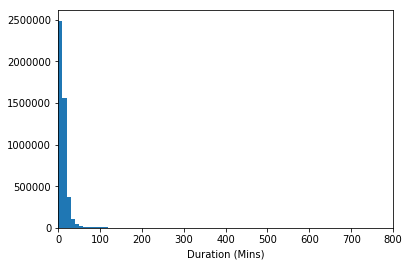

In [32]:
#Standard-scale plot
bin_edges = np.arange(0, df.duration_min.max()+ 10, 10)
plt.hist(data=df, x='duration_min', bins=bin_edges)
plt.xlim(0, 800)
plt.xlabel('Duration (Mins)');

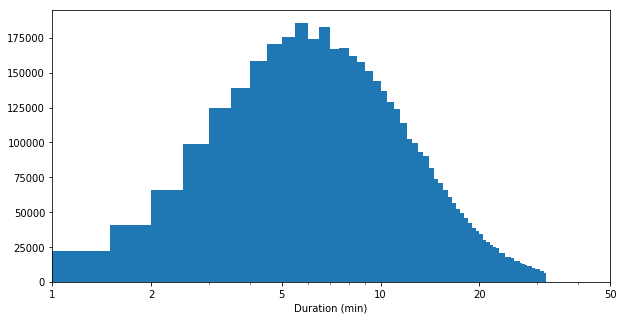

In [33]:
#Heavily skewed to the right.  Log transformation
bin_edges = 10* np.arange(log_trans(df.duration_min.min()), log_trans(df.duration_min.max()) + 0.05, 0.05)

plt.figure(figsize=[10,5])
plt.hist(data=df, x='duration_min', bins=bin_edges)
plt.xscale('log')
tick_locs= [1,2,5,10,20,50,100,200, 500,1000,2000]
plt.xticks(tick_locs, tick_locs)
plt.xlim(1,50)
plt.xlabel('Duration (min)');

Comment

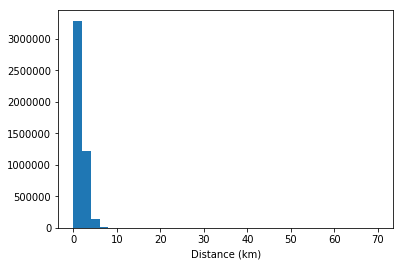

In [34]:
bin_edges = np.arange(0, df.distance.max() + 2, 2)
plt.hist(data=df, x='distance', bins= bin_edges);
plt.xlabel('Distance (km)');

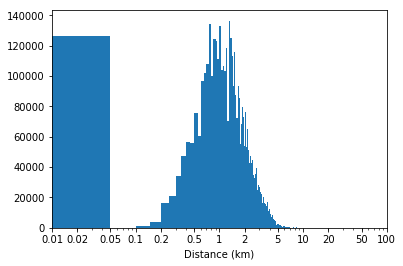

In [35]:
bins_edge = 10 * np.arange(0, log_trans(df.distance.max()) + 0.005, 0.005)
plt.hist(data=df, x='distance', bins=bins_edge)
plt.xscale('log')
tick_locs= [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100]
plt.xticks(tick_locs,tick_locs)
plt.xlabel('Distance (km)');

In [36]:
#Drop entries that have 0 distance as we cannot perform analysis on those data point.  Save them in another dataframe in case we need to reference them later

df_error = df[df.distance == 0]
df = df[df.distance != 0]

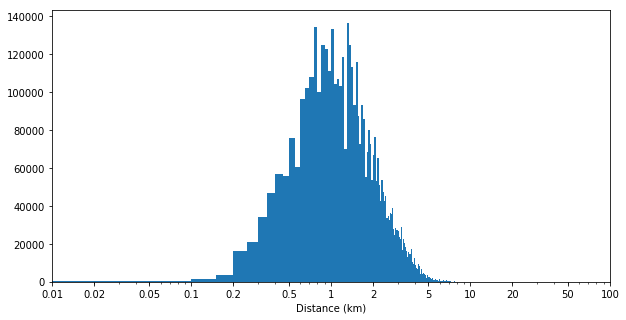

In [37]:
bins_edge = 10 * np.arange(0, log_trans(df.distance.max()) + 0.005, 0.005)
plt.figure(figsize=[10,5])
plt.hist(data=df, x='distance', bins=bins_edge)
plt.xscale('log')
tick_locs= [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100]
plt.xticks(tick_locs,tick_locs)
plt.xlabel('Distance (km)');

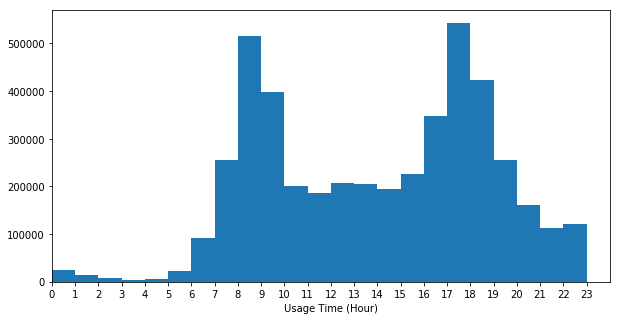

In [38]:
plt.figure(figsize=[10,5])
bin_edge = np.arange(0, 24, 1)
plt.hist(data=df, x='start_hour', bins=bin_edge);
plt.xlim(0,24)
plt.xticks(bin_edge)
plt.xlabel('Usage Time (Hour)');

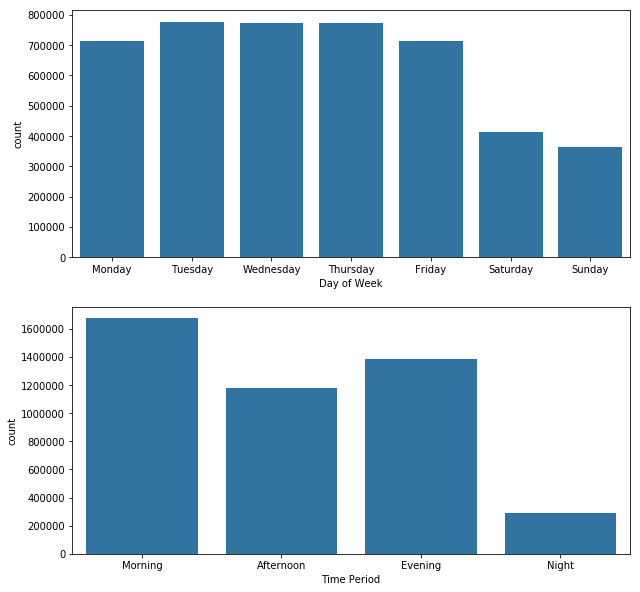

In [39]:
fig, ax = plt.subplots(2,1, figsize=[10,10])
color = sb.color_palette()[0]
sb.countplot(data=df, x='start_week', ax=ax[0], color= color)
sb.countplot(data=df, x='period', ax=ax[1], color= color)
ax[0].set_xlabel('Day of Week')
ax[1].set_xlabel('Time Period');

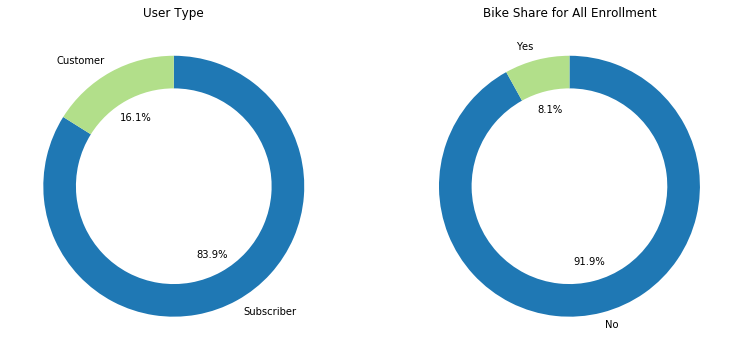

In [40]:
fig, ax= plt.subplots(1,2, figsize=[13,6])

count1=df.user_type.value_counts()
count2=df.bike_share_for_all_trip.value_counts()
colors= sb.color_palette('Paired')[1], sb.color_palette('Paired')[2]

ax[0].pie(count1, labels=count1.index, startangle=90, counterclock=False, autopct='%.1f%%', wedgeprops={'width':0.25}, colors=colors)
ax[1].pie(count2, labels=count2.index, startangle=90, counterclock=False, autopct='%.1f%%', wedgeprops={'width':0.25}, colors=colors)
ax[0].set_title('User Type')
ax[1].set_title('Bike Share for All Enrollment');

### Bivariate Exploration

In [49]:
#I have sample 5000 entries so that certain plots are clearer and render faster
np.random.seed(0)
samples = np.random.choice(df.shape[0], 5000, replace = False)
df_samp = df.loc[samples,:]
df_samp['log_min'] = df_samp['duration_min'].apply(log_trans)
df_samp['log_distance'] = df_samp['distance'].apply(log_trans)

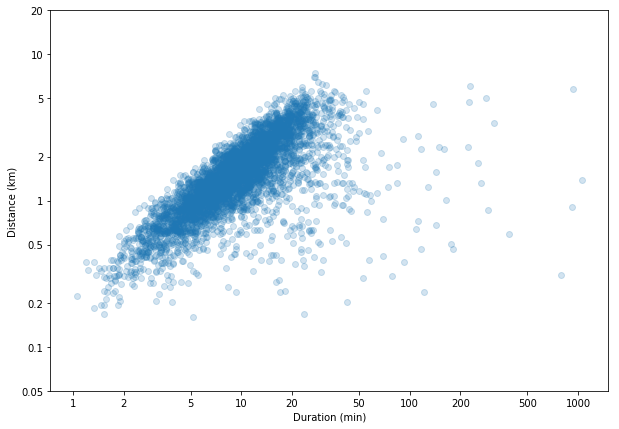

In [50]:
#scatter plot of duration vs. distance, with log transform on both axis

tick_locs1= [1,2,5,10,20,50,100,200, 500,1000] # values for duration
tick_locs2= [0.05,0.1,0.2,0.5,1,2,5,10,20] # values for distance

plt.figure(figsize=[10,7])

plt.scatter(data=df_samp, x='log_min', y='log_distance', alpha= 0.2)

plt.xticks(log_trans(tick_locs1), tick_locs1)
plt.yticks(log_trans(tick_locs2), tick_locs2)

plt.xlabel('Duration (min)')
plt.ylabel('Distance (km)');

In [51]:
df_samp[['log_min','log_distance']].corr()

,log_min,log_distance
log_min,1.000000,0.689065
log_distance,0.689065,1.000000


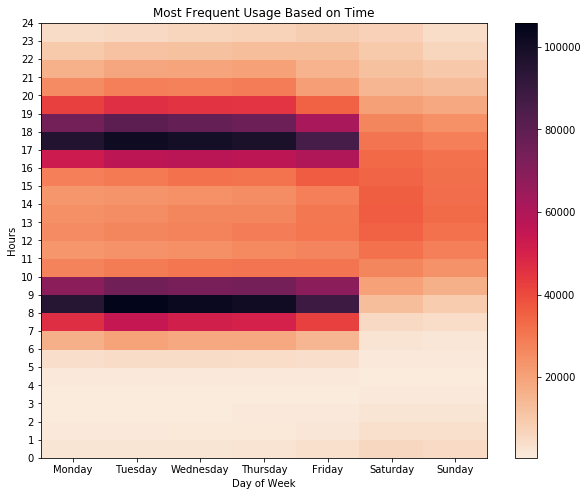

In [52]:
df['start_week_num'] = df.start_time.dt.dayofweek

plt.figure(figsize=[10,8])
x_pos = np.arange(0.5, 7.5, 1) #Position of x labels
x_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] #Define x labels

bins_x= np.arange(0,8,1)
bins_y = np.arange(0,25,1)
plt.hist2d(data=df, x='start_week_num', y='start_hour', cmap='rocket_r', cmin=0.1, bins=[bins_x,bins_y])
plt.xticks(x_pos,x_label)
plt.yticks(bins_y)
plt.xlabel('Day of Week')
plt.ylabel('Hours')
plt.colorbar()
plt.title('Most Frequent Usage Based on Time');

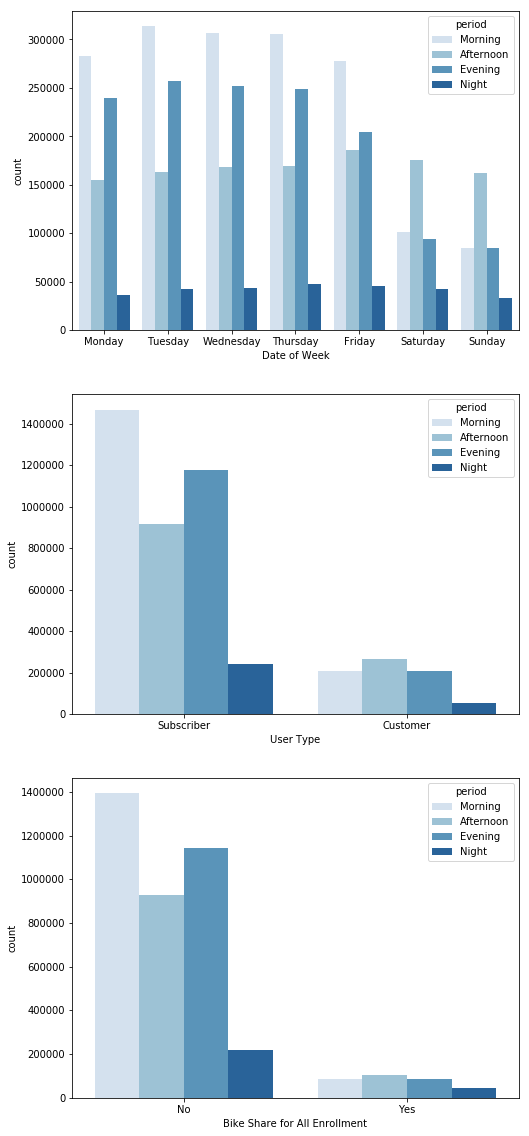

In [53]:
fig, ax = plt.subplots(3,1, figsize=[8,20])
sb.countplot(data=df, x='start_week', hue='period', palette='Blues', ax=ax[0])
sb.countplot(data=df, x='user_type', hue='period', palette='Blues', ax=ax[1], order= df.user_type.value_counts().index)
sb.countplot(data=df, x='bike_share_for_all_trip', hue='period', palette='Blues', ax=ax[2]);
ax[0].set_xlabel('Date of Week')
ax[1].set_xlabel('User Type')
ax[2].set_xlabel('Bike Share for All Enrollment');

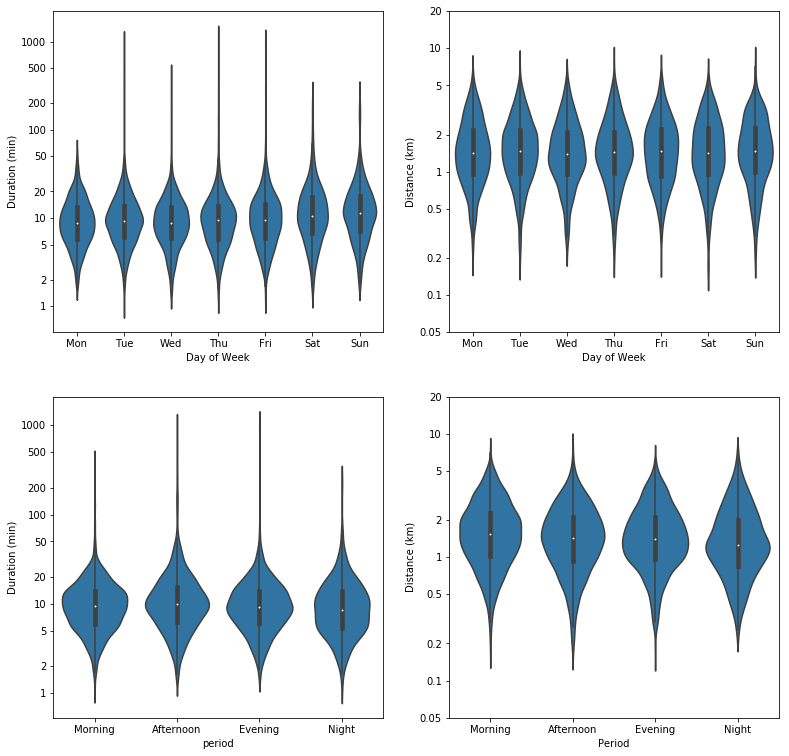

In [56]:
x_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] #Define x labels
cat_vars = ['start_week', 'period'] #Define categorical variables

fig, ax = plt.subplots(2,2, figsize=[13,13])
colors = sb.color_palette()[0]
for i in range(len(cat_vars)):
    var = cat_vars[i]
    sb.violinplot(data=df_samp, x=var, y= 'log_min', ax=ax[i,0], color=colors)
    sb.violinplot(data=df_samp, x=var, y='log_distance', ax=ax[i,1], color=colors)
        
    ax[0,i].set_xticklabels(labels=x_label)
    
    ax[i,0].set_yticks(log_trans(tick_locs1))
    ax[i,0].set_yticklabels(tick_locs1)
    ax[i,1].set_yticks(log_trans(tick_locs2))
    ax[i,1].set_yticklabels(tick_locs2)    
    
    ax[0,i].set_xlabel('Day of Week')
    ax[1,i].set_xlabel('Period')
    ax[i,0].set_ylabel('Duration (min)')
    ax[i,1].set_ylabel('Distance (km)');